In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
import tables
import h5py

#!jt -t onedork -cellw 100%

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=1
vscal=5
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

1282512 bytes
[[2.         2.00125119 2.00250478 ... 4.13022319 4.13022319 4.13022319]
 [1.99574112 1.99698415 1.99822957 ... 4.13022319 4.13022319 4.13022319]
 [1.99148225 1.99271706 1.99395426 ... 4.13022319 4.13022319 4.13022319]
 ...
 [1.96592899 1.9671133  1.96829999 ... 4.13022319 4.13022319 4.13022319]
 [1.96167012 1.96284581 1.96402388 ... 4.13022319 4.13022319 4.13022319]
 [1.95741124 1.95857826 1.95974766 ... 4.13022319 4.13022319 4.13022319]]
0.0
[2.0050191  2.00072758 1.99643583 1.99214385 1.98785164 1.98355921
 1.97926655 1.97497366 1.97068054 1.96638719 1.96209361]


In [5]:
print(rnputil)

M=massnp[0,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.687,1.3,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print(rminus,rplus,rcosm)


['801570' '11' '72870' '2.0' '0.05' '1.0' '0.95' '0.1' 'True' '0.0' 'edd']
N=801570
0.6765641409464849 1.529220931323733 4.130223190387632


In [6]:
uval=0

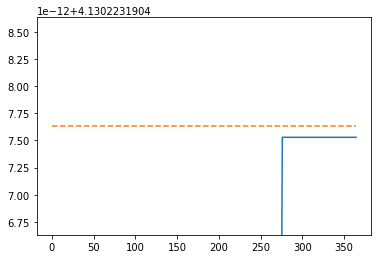

In [7]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
plt.ylim(rcosm-.000000000001,rcosm+.000000000001)
plt.show()

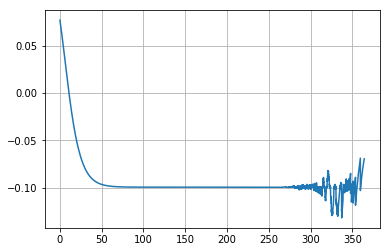

In [8]:
plt.plot(vrange,dsignpv[uval])
#plt.yscale('log')
#plt.ylim(-.11,-.09)
plt.grid()
plt.show()

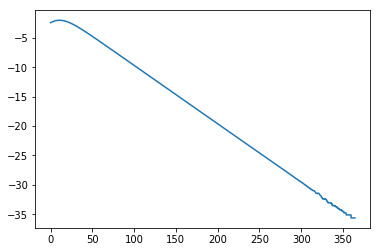

In [9]:
plt.plot(vrange,signp[uval])
plt.show()

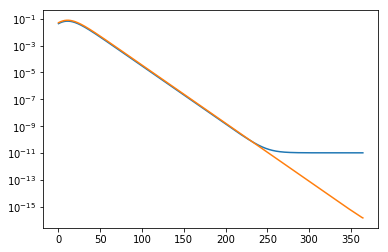

In [10]:
plt.plot(vrange,np.abs(drnpu[uval]))
plt.plot(vrange,drnpv[uval])
plt.yscale('log')
plt.show()

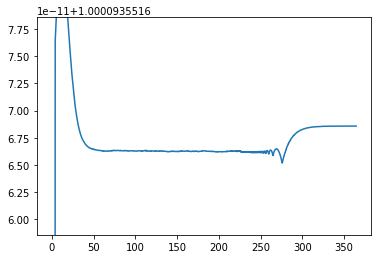

In [15]:
plt.plot(vrange,massnp[uval])
plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.show()

In [12]:
print(rnp[0])
print(drnpv[0])
print(massnp[0])

[2.         2.00125119 2.00250478 ... 4.13022319 4.13022319 4.13022319]
[4.96734548e-02 4.97689952e-02 4.98645274e-02 ... 1.54682842e-16
 1.54416290e-16 1.54150664e-16]
[1.         1.         1.         ... 1.00009355 1.00009355 1.00009355]


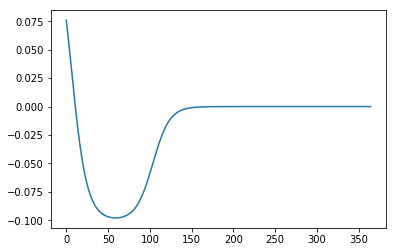

[ 7.59118034e-02  7.57591388e-02  7.56062404e-02 ... -6.27338999e-13
 -6.26257958e-13 -6.25180673e-13]


In [17]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

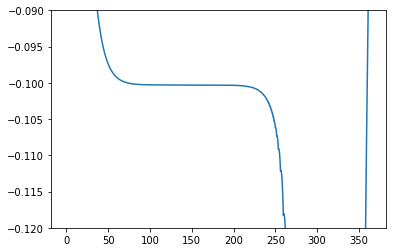

[ 0.07601403  0.07586099  0.07570771 ... -0.07044574 -0.07032435
 -0.07020338]


In [67]:
massnp2=massnp[0,-100]+10**(-100)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp2*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

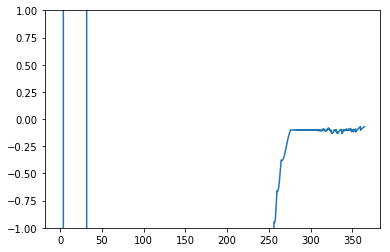

[-2.01465200e+02 -2.01853487e+02 -2.02239109e+02 ...  1.68877195e-08
  5.87396174e-08  1.64324033e-07]


In [64]:
rnp2=rnp[0,-100]+10**(-40)*np.random.random(Nv)

dsignpv3=2*((massnp[0]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
plt.ylim(-1,1)
plt.show()
print(dsignpv2)

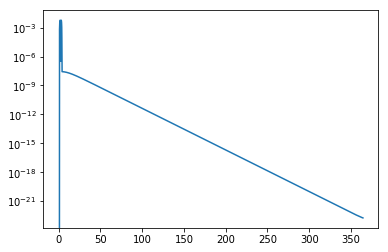

In [14]:
plt.plot(vrange,np.abs(dphinpv[0]))
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()